In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urljoin
mpl.rcParams['axes.unicode_minus'] = False   
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["font.size"] = 15
%matplotlib inline

# 1. 아래 그림과 같이 맨 아랫줄에 *가 7개인 산 모양 2개를 출력하는 프로그램을 for loop문을 사용해서 만드시오. 단, 산과 산 사이에는 공백이 한 개 있음.

In [2]:
for i in range(1,5):
    a = ' ' * (4 - i)
    b = '*' * (2 * i - 1)
    c = ' ' * (9 - 2 * i)
    print('%s%s%s%s'%(a,b,c,b))

   *       *
  ***     ***
 *****   *****
******* *******


# 2. 다음의 지뢰찾기 문제를 해결해 보시오.

## 정수 n (단 n은 3이상)을 매개변수로 하여 크기가(n,n)인 리스트를 만들고 여기에 '*'과 '.'을 랜덤하게 채워넣어 이를 출력하고 리턴하는 함수 create_mine(n)을 만드시오.

In [3]:
def creat_mine(n):
    a = []
    b = []
    for i in range(n*n):
        a.append(random.randint(0,1))
    for i in a:
        if i == 0:
            b.append('.')
        else:
            b.append('*')
    print(np.array(b).reshape(n,n))

n = int(input())
creat_mine(n)

10
[['.' '.' '*' '.' '*' '.' '.' '*' '.' '*']
 ['*' '.' '*' '.' '*' '*' '.' '*' '*' '*']
 ['*' '.' '.' '.' '.' '.' '*' '.' '*' '*']
 ['*' '.' '.' '.' '*' '.' '.' '*' '*' '.']
 ['.' '*' '*' '*' '.' '.' '*' '*' '*' '*']
 ['*' '.' '.' '.' '.' '*' '*' '*' '.' '*']
 ['.' '*' '.' '.' '.' '.' '.' '*' '.' '*']
 ['*' '.' '*' '*' '*' '.' '*' '*' '.' '*']
 ['.' '.' '*' '*' '.' '*' '.' '.' '*' '.']
 ['.' '*' '.' '*' '.' '.' '*' '*' '.' '.']]


In [4]:
def creat_mine(n):
    a = []
    b = []
    for i in range(n*n):
        a.append(random.randint(0,1))
    for i in a:
        if i == 0:
            b.append('.')
        else:
            b.append('*')
    b = np.array(b).reshape(n,n)
    for i in range(0,n):
        for j in range(0,n):
            stack = 0
            if b[i][j] == '.':
                # 상단
                if i != 0 and b[i-1][j] == '*':
                    stack += 1
                # 하단
                if i != n-1 and b[i+1][j] == '*':
                    stack += 1
                # 왼쪽
                if j != 0 and b[i][j-1] == '*':
                    stack += 1
                # 오른쪽
                if j != n-1 and b[i][j+1] == '*':
                    stack += 1
                b[i][j] = str(stack)
    print(b)

n = int(input())
creat_mine(n)

10
[['0' '1' '2' '*' '*' '*' '*' '*' '*' '2']
 ['2' '*' '*' '*' '2' '2' '*' '*' '3' '*']
 ['*' '3' '*' '2' '1' '2' '*' '3' '1' '*']
 ['2' '2' '*' '2' '*' '*' '*' '*' '1' '2']
 ['*' '*' '*' '3' '*' '4' '*' '3' '2' '*']
 ['2' '1' '2' '*' '4' '*' '*' '*' '*' '*']
 ['*' '2' '2' '*' '*' '3' '2' '*' '*' '*']
 ['2' '*' '*' '3' '2' '*' '3' '*' '2' '1']
 ['0' '1' '2' '*' '3' '*' '*' '2' '0' '1']
 ['0' '0' '1' '*' '*' '*' '*' '1' '1' '*']]


# 3. 하이퍼볼릭 탄젠트 함수의 그래프를 -2*pi에서 2*pi까지 matplotlib를 사용하여 그리시오

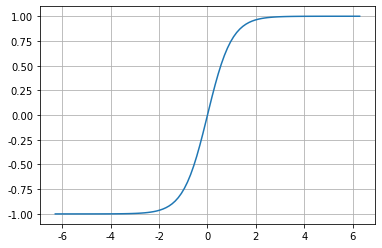

In [5]:
x = np.linspace(-2*np.pi,2*np.pi, 100)
y = np.tanh(x)
plt.plot(x,y)
plt.grid()
plt.show()

# 4. 멜론 사이트에서 2020년 5월 월간 국내종합 차트 Top100 곡을 크롤링하여 제목, 가수, 앨범명, 전월순위 필드를 가지는 데이터프레임을 만들고, 1위에서 10위 까지를 출력하는 프로그램을 작성하시오. 단, 인덱스는 순위로 만들 것

In [6]:
rank = []
song = []
name = []
album = []
rank_compare = []
for i in range(1,52,50):
    header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
    url_a = 'https://www.melon.com/chart/month/index.htm#params%5Bidx%5D='
    url_b = '&params%5BrankMonth%5D=202005&params%5BisFirstDate%5D=false&params%5BisLastDate%5D=true'
    url = url_a + str(i) + url_b
    req = requests.get(url, headers = header)
    html = req.text
    soup = BeautifulSoup(html, 'html.parser')
    
    if i == 1:
        lists = soup.find_all(class_ = 'lst50')
    else :
        lists = soup.find_all(class_ = 'lst100')
        
    for li in lists:
        
        rank.append(int(li.find(class_ = 'rank').get_text()))
        tmp_rank = int(li.find(class_ = 'rank').get_text())
        song.append(li.find(class_ = 'wrap_song_info').find(class_='ellipsis rank01').get_text().replace('\n',''))
        name.append(li.find(class_ = 'wrap_song_info').find(class_ ='checkEllipsis').get_text())
        tmp_list = li.find_all(class_ = 'wrap_song_info')
        album.append(tmp_list[1].find(class_ ='ellipsis rank03').get_text().replace('\n',''))
        rank_check = li.find(class_ = 'rank_wrap').find(class_ = 'none').get_text()

        if rank_check == '단계 하락':
            tmp = int(li.find(class_ = 'rank_wrap').find(class_ = 'down').get_text())
            rank_compare.append(tmp_rank-tmp)
        elif rank_check == '단계 상승':
            tmp = int(li.find(class_ = 'rank_wrap').find(class_ = 'up').get_text())
            rank_compare.append(tmp_rank+tmp)
        else :
            rank_compare.append(tmp_rank)

In [7]:
df = pd.DataFrame(dict(zip(['순위','전월순위','곡','이름','앨범'],[rank,rank_compare,song,name,album])))
df.set_index('순위',inplace = True)
df

,전월순위,곡,이름,앨범
순위,,,,
1,1,에잇(Prod.&Feat. SUGA of BTS),아이유,에잇
2,2,아로하,조정석,슬기로운 의사생활 OST Part 3
3,3,살짝 설렜어 (Nonstop),오마이걸,NONSTOP
4,4,나비와 고양이 (feat.백현 (BAEKHYUN)),볼빨간사춘기,사춘기집Ⅱ 꽃 본 나비
5,3,시작,가호 (Gaho),이태원 클라쓰 OST Part.2
...,...,...,...,...
96,62,"아마두 (feat.우원재, 김효은, 넉살, Huckleberry P)","염따, 딥플로우, 팔로알토 (Paloalto), The Quiett, 사이먼 도미닉",Dingo X DAMOIM (Part 2)
97,83,Señorita,"Shawn Mendes, Camila Cabello",Señorita
98,98,Zombie,DAY6 (데이식스),The Book of Us : The Demon
